<a href="https://colab.research.google.com/github/beallac/iitsec2022/blob/main/Experiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis Overview
=================



In [1]:
# import standard Python packages
import numpy as np
import pandas as pd 
import seaborn as sns

from scipy.stats import ttest_ind, ttest_rel
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
SUMMARY_DATA        = '/content/ab3_stim_file3_data_summary.csv'
TIME_SERIES_DATA    = '/content/ab3_stim_file3_data_gaze.csv'

# Summary data

In [2]:
# Load the summary data file
sdata = pd.read_csv(SUMMARY_DATA)
sdata.describe()
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     40 non-null     float64
 1   ID       40 non-null     int64  
 2   Correct  40 non-null     int64  
 3   HR       40 non-null     float64
 4   CL       40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


In [4]:
# Set the dataframe's index to the ID column
df = sdata[sdata.ID != 42].set_index('ID')
df.info()
# df.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 21 to 83
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     36 non-null     float64
 1   Correct  36 non-null     int64  
 2   HR       36 non-null     float64
 3   CL       36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

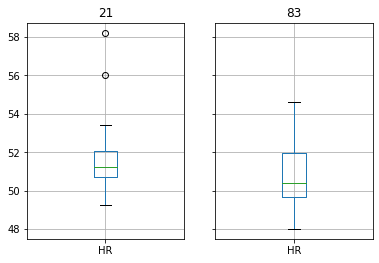

In [5]:
# Prepare the data for grouping by index ID
grouped = df.groupby(level = 'ID')

# Create a boxplot of heartrate
grouped.boxplot(column = 'HR')

          Time   Correct         HR        CL
ID                                           
21  257.951183  0.944444  51.870556  0.580556
83  341.500389  0.555556  50.676111  0.594444


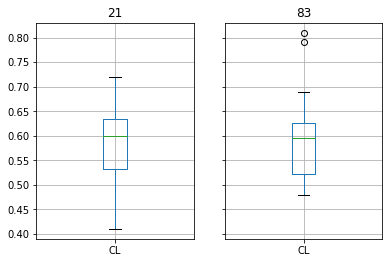

In [6]:
# Create a boxplot of cognitive load
grouped.boxplot(column = 'CL')

print(grouped.mean())
# grouped.describe()

ID
21    AxesSubplot(0.125,0.125;0.775x0.755)
83    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

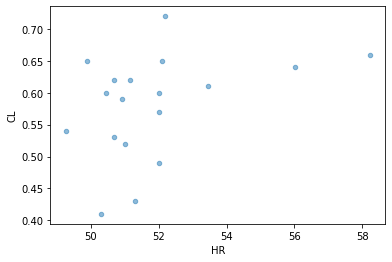

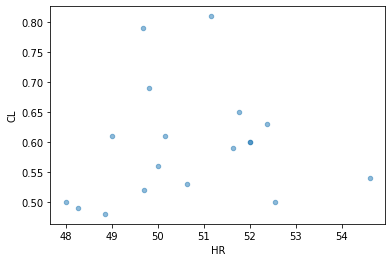

In [7]:
# Create a scatter plot of cognitive load vs heart rate
grouped.plot.scatter(x = 'HR', y = 'CL', alpha = 0.5)

# Time series

In [9]:
tdata = pd.read_csv(TIME_SERIES_DATA)

In [10]:
tdata.describe()
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368935 entries, 0 to 368934
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    368935 non-null  float64
 1   ID      368935 non-null  int64  
 2   Heart   368935 non-null  int64  
 3   Cog     368935 non-null  float64
 4   EyeY    368935 non-null  float64
 5   EyeP    368935 non-null  float64
 6   EyeR    368935 non-null  float64
 7   HeadY   368935 non-null  float64
 8   HeadP   368935 non-null  float64
 9   HeadR   368935 non-null  float64
 10  FullY   368935 non-null  float64
 11  FullP   368935 non-null  float64
 12  FullR   368935 non-null  float64
 13  Open    368935 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 39.4 MB


In [12]:
print(tdata.shape)
df = tdata[tdata.ID != 42].set_index('ID')
print(df.shape)
df = tdata[(tdata.ID != 42) & (tdata.EyeY != 135)].set_index('ID')
print(df.shape)
grouped = df.groupby(level = 'ID')
df.info()

(368935, 14)
(365327, 13)
(361503, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361503 entries, 21 to 83
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    361503 non-null  float64
 1   Heart   361503 non-null  int64  
 2   Cog     361503 non-null  float64
 3   EyeY    361503 non-null  float64
 4   EyeP    361503 non-null  float64
 5   EyeR    361503 non-null  float64
 6   HeadY   361503 non-null  float64
 7   HeadP   361503 non-null  float64
 8   HeadR   361503 non-null  float64
 9   FullY   361503 non-null  float64
 10  FullP   361503 non-null  float64
 11  FullR   361503 non-null  float64
 12  Open    361503 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 38.6 MB


In [13]:
grouped[['EyeY','HeadY']].std()

,EyeY,HeadY
ID,,
21,7.131093,9.232884
83,6.772566,3.992233


21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

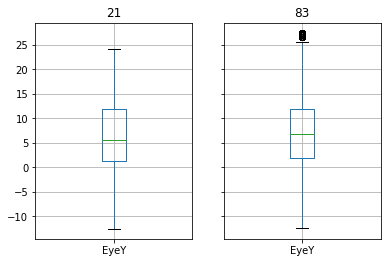

In [14]:
grouped.boxplot(column = 'EyeY')

21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

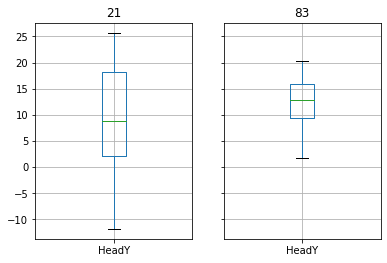

In [15]:
grouped.boxplot(column = 'HeadY')

ID
21    AxesSubplot(0.125,0.125;0.775x0.755)
83    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

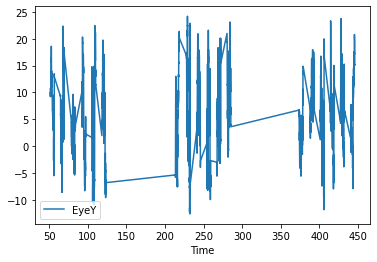

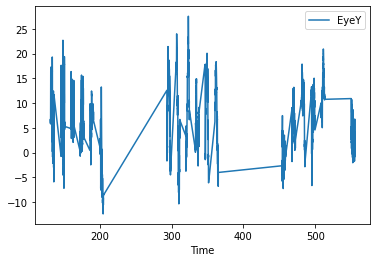

In [16]:
# df.plot(x = 'Time', y = 'EyeY', figsize = (14,6))
# df.plot(x = 'Time', y = 'HeadY', figsize = (14,6))
grouped.plot(x = 'Time', y = 'EyeY')

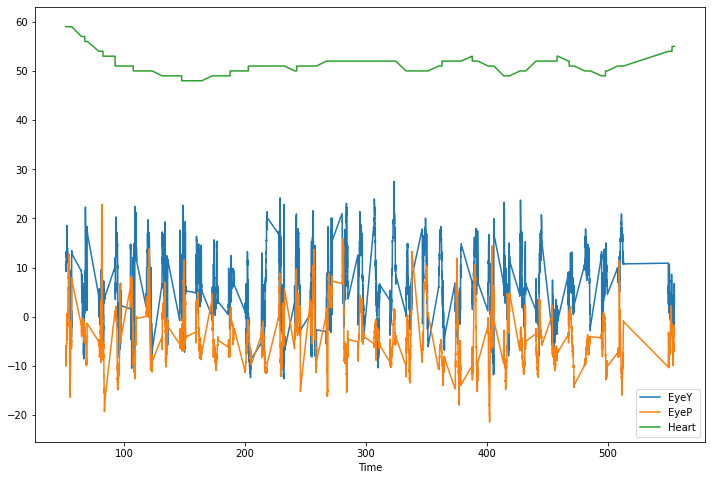

In [17]:
df[['Time', 'EyeY', 'EyeP', 'Heart']].plot(x='Time', figsize = (12,8))

In [100]:
# load necessary modules
import pandas as pd    
from scipy import signal
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [110]:
# Estimate power spectral density using a periodogram
# https://milos.ai/2018/05/extracting-frequencies-from-time-series-python

dfs = rdata.set_index('Time')
print(dfs.shape)
f, Pxx = signal.periodogram(dfs.EyeY)

(368935, 13)


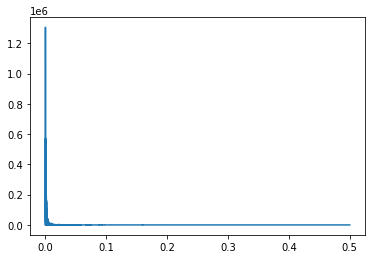

In [115]:
plt.plot(f, Pxx)